In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table

## Datasets

Note that the CMIP6 dataset is observation-based to the end of 2014, cmip5 is observation-based to the end of 2005

In [46]:
directory = '/Users/ph290/Downloads/'
file1='RCP85_MIDYR_CONC.DAT'
#https://data.geomar.de/thredds/catalog/open_access/keller_et_al_2018_gmd/CSIRO_Mk3L-COAL_source_code/extra/C2_6/catalog.html?dataset=keller_et_al_2018_gmd/CSIRO_Mk3L-COAL_source_code/extra/C2_6/RCP85_MIDYR_CONC.DAT
file2='mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_0000-2014.csv'
# http://climatecollege.unimelb.edu.au/cmip6

## functions

In [ ]:
def ordinary_least_squares_results(x,y):
    xsort = np.argsort(x)
    x = x[xsort]
    y = y[xsort]
    xb = sm.add_constant(x)
    model = sm.OLS(y,xb)
    results = model.fit()
    x2 = np.linspace(np.min(x),np.max(x),np.size(x))
    y2 = results.predict(sm.add_constant(x2))
    return results

## Plotting

cmip6 trend = 1.912537246
cmip5 trend = 1.97891039526


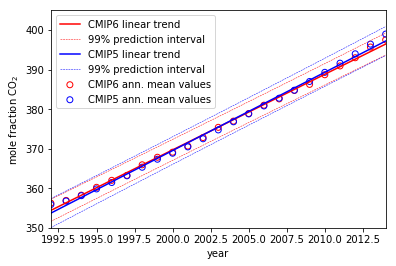

In [121]:
loc1 = np.where((cmip6.year >= 1992) & (cmip6.year <= 2014))[0]
loc2 = np.where((rcp85.YEARS >= 1992) & (rcp85.YEARS <= 2014))[0]

plt.scatter(cmip6.year,cmip6.data_mean_global,label='CMIP6 ann. mean values', facecolors='none',color='r')
plt.scatter(rcp85.YEARS,rcp85.CO2,label='CMIP5 ann. mean values', facecolors='none',color='b')

results1 = ordinary_least_squares_results(cmip6.year[loc1].values,cmip6.data_mean_global[loc1].values)
st, data, ss2= summary_table(results1,alpha=0.001)
plt.plot(cmip6.year[loc1],data[:,2],'r',label='CMIP6 linear trend')
mean_ci_low, mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T
plt.plot(cmip6.year[loc1], predict_ci_low, 'r--', lw=0.5,label='99% prediction interval')
plt.plot(cmip6.year[loc1], predict_ci_upp, 'r--', lw=0.5)


results2 = ordinary_least_squares_results(rcp85.YEARS[loc2].values,rcp85.CO2[loc2].values)
st, data, ss2= summary_table(results2,alpha=0.001)
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
plt.plot(rcp85.YEARS[loc2],data[:,2],'b',label='CMIP5 linear trend')
mean_ci_low, mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T
plt.plot(rcp85.YEARS[loc2], predict_ci_low, 'b--', lw=0.5,label='99% prediction interval')
plt.plot(rcp85.YEARS[loc2], predict_ci_upp, 'b--', lw=0.5)

plt.xlim([1992,2014])
plt.ylim([350,405])
plt.legend()
plt.xlabel('year')
plt.ylabel('mole fraction CO$_2$')

print 'cmip6 trend = '+str(results1.params[1])
print 'cmip5 trend = '+str(results2.params[1])

